# Motivation

How Switzerland is handling COVID ? It seems pretty bad these days. Compared to the first wave where we were supposed to be among the best. 

But is it really the case or is there a mathematical tricks hidden behind that ? 
One idea is that when comparing countries (Switzerland, France, US) we often look at the nb of case per 100k habitants. But is it fair ? 

This notebook will try to study that fact 

In [1]:
import numpy as np
import pandas as pd

df = pd.read_csv("https://covid.ourworldindata.org/data/owid-covid-data.csv")
df

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index
0,ABW,North America,Aruba,2020-03-13,2.0,2.0,NaN,NaN,0.0,NaN,...,35973.781,NaN,NaN,11.62,NaN,NaN,NaN,NaN,76.29,NaN
1,ABW,North America,Aruba,2020-03-19,NaN,NaN,0.286,NaN,NaN,0.0,...,35973.781,NaN,NaN,11.62,NaN,NaN,NaN,NaN,76.29,NaN
2,ABW,North America,Aruba,2020-03-20,4.0,2.0,0.286,NaN,0.0,0.0,...,35973.781,NaN,NaN,11.62,NaN,NaN,NaN,NaN,76.29,NaN
3,ABW,North America,Aruba,2020-03-21,NaN,NaN,0.286,NaN,NaN,0.0,...,35973.781,NaN,NaN,11.62,NaN,NaN,NaN,NaN,76.29,NaN
4,ABW,North America,Aruba,2020-03-22,NaN,NaN,0.286,NaN,NaN,0.0,...,35973.781,NaN,NaN,11.62,NaN,NaN,NaN,NaN,76.29,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
57175,NaN,NaN,International,2020-11-12,696.0,NaN,NaN,7.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
57176,NaN,NaN,International,2020-11-13,696.0,NaN,NaN,7.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
57177,NaN,NaN,International,2020-11-14,696.0,NaN,NaN,7.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
57178,NaN,NaN,International,2020-11-15,696.0,NaN,NaN,7.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [2]:
total_cases = dict(df.groupby("location").last()["new_cases_per_million"].dropna())
population = dict(df.groupby("location").max()["population"])
sorted_case = np.array([v for k,v in sorted(total_cases.items(),key =lambda item : item[1])])

sorted_population = np.array([population[k] for k,v in sorted(total_cases.items(),key =lambda item : item[1])])

for k,v in sorted(total_cases.items(),key =lambda item : item[1])[-30:]:
    print(k,"{:.2f}".format(v))

    
print("______")
print("World : {:.2f}".format(total_cases["World"]))

Sint Maarten (Dutch part) 233.20
Ukraine 244.23
Kosovo 259.21
Panama 311.49
Netherlands 315.61
United Kingdom 367.70
Estonia 368.63
Romania 368.86
Puerto Rico 390.44
Liechtenstein 393.32
United States 399.30
France 417.14
Slovenia 442.54
Gibraltar 445.22
Sweden 447.46
Belgium 450.66
Macedonia 474.23
Lithuania 503.62
Serbia 511.71
Italy 561.96
Croatia 575.36
Poland 577.44
Austria 586.03
Portugal 591.86
Hungary 672.34
Montenegro 781.77
Georgia 791.39
Guam 924.26
Luxembourg 979.27
Andorra 1902.54
______
World : 59.23


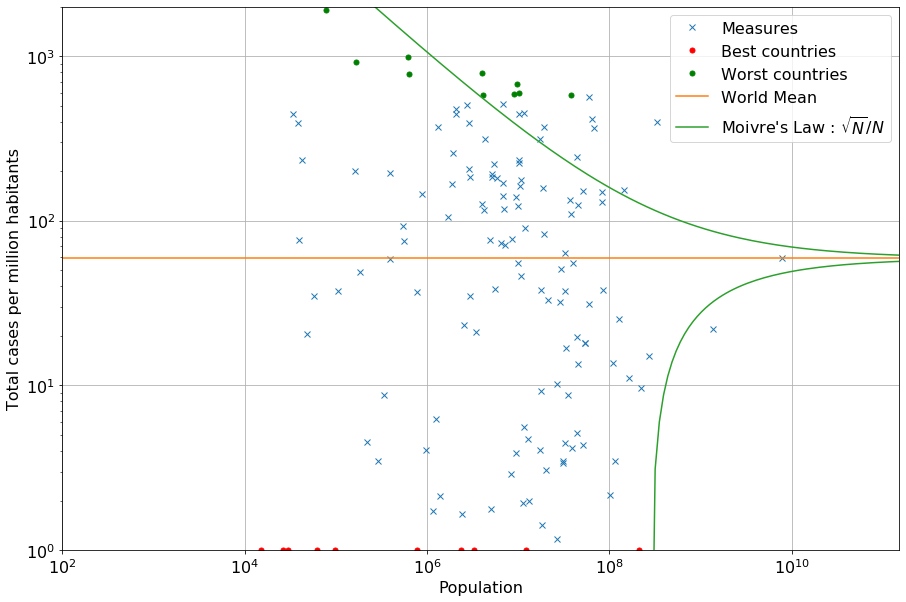

In [34]:
import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 16})



mean = (sorted_case*sorted_population).mean()/sorted_population.sum()
mean = total_cases["World"]
fig, ax = plt.subplots(figsize=(15,10))
ax.loglog(sorted_population[10:-10],sorted_case[10:-10], 'x')
ax.loglog(sorted_population[:10],sorted_case[:10]+1, ".", color="red", markersize=10 )
ax.loglog(sorted_population[-10:],sorted_case[-10:]+1, ".",color="green", markersize=10 )
ax.loglog([100,100000,1e6,max_val], [mean,mean,mean, mean])


th_x = np.logspace(2, np.log10(max_val), 200)
th_y = np.sqrt(th_x)/th_x*1e6+total_cases["World"]
th_y_under = total_cases["World"] -np.sqrt(th_x)/th_x*1e6

ax.loglog(th_x,th_y, color="C2")
ax.loglog(th_x,th_y_under, color="C2",)

ax.set_xlim([100, max_val])
ax.set_ylim([1, 2000])



ax.set_xlabel("Population")
ax.set_ylabel("Total cases per million habitants")

ax.grid()

ax.legend(["Measures", "Best countries", "Worst countries", "World Mean", "Moivre's Law : $\sqrt{N} / N$"])
